## Exercise 1: a scatter plot

1. Download the file `halos.dat` from today's exercise page. This is a text file containing $x$, $y$, $z$ positions and masses for dark matter halos in a cosmological simulation. Positions are in Mpc and masses are in $M_{\odot}$.





In [13]:
#Code Here
import numpy as np
import astropy
from astropy.io import ascii
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
halos = astropy.io.ascii.read("halos.dat",header_start=2,data_start=3,delimiter=" ")
size = 70*(np.log10(halos["mass"])-11.4)



2. Create a scatter plot of the $(x,y)$ coordinates of the halos. Represent each halo by a circle whose size is proportional to the logarithm of the halo’s mass: size = $70[\log(M/M_{\odot}) - 11.4]$.



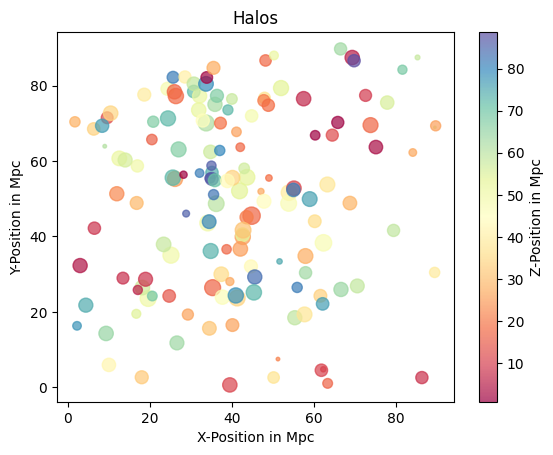

In [14]:
#Code Here
plot=plt.scatter(data=halos,x="x", y="y", s=size,c="z",cmap="Spectral",alpha=0.7)
plt.title("Halos")
plt.xlabel("X-Position in Mpc")
plt.ylabel("Y-Position in Mpc")
colorbar = plt.colorbar(plot)
colorbar.set_label("Z-Position in Mpc")

3. Using your favorite color map, make the color of each circle proportional to the $z$-coordinate of the corresponding halo. If you don’t like the default colors, you can change the color map using `plt.set_cmap('Spectral')`. See the gallery for examples.



4. Include an appropriate title and axis labels.

In [15]:
#Code Here

## Exercise 2: pulsars

Download the file "atnf_pulsars_20200112.dat" from the exercise page. This is a fixed-width ASCII table containing data from the Australia Telescope National Facility (ATNF) catalog of pulsars in our Galaxy known as of 1/12/20.

1. Use `astropy.io.ascii` to read the table. You might need to give the reader the hint that the format is 'fixed_width' and the header starts on line 2.




In [16]:
#Code Here
pulse = astropy.io.ascii.read("atnf_pulsars_20200112.dat",header_start=2,data_start=3,delimiter="|",format="fixed_width")




2. Extract the pulsar periods $P$ (column `period`), rate of change of periods $\dot{P}$ (column `period_dot`), and companion types (column `companion_type`).



In [17]:
#Code Here
extract = pulse[["period","period_dot","companion_type"]]
CompType = extract["companion_type"]

3. The companion type will be masked out if the pulsar is an isolated pulsar, or else one of 'MS', 'NS', 'CO', 'He', or 'UL' depending on the type of binary companion. Make two boolean mask arrays to select the pulsars that are in binaries vs. not in binaries. *Hint*: use the `mask` attribute of the `companion_type` column object.



In [18]:
#Code Here
binary = CompType.mask
lonely = ~CompType.mask
binary = extract[binary]
lonely = extract[lonely]

4. Make a log-log scatter plot of $\dot{P}$ vs. $P$. Make binary pulsars and isolated pulsars two separate colors, and produce an appropriate legend. Make appropriate axis labels ($P$ is in units of seconds, while $\dot{P}$ is dimensionless).



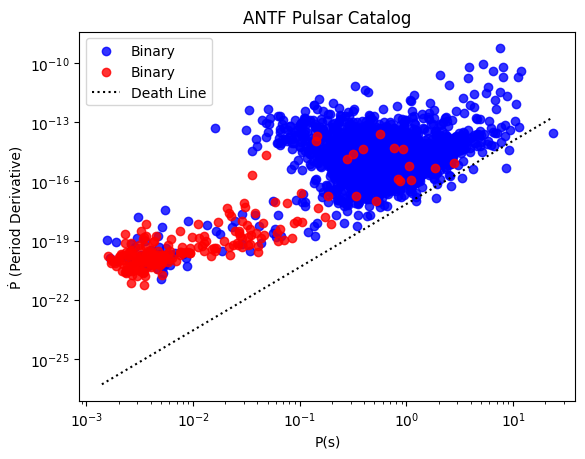

In [24]:
#Code Here

scatter = plt.scatter(data=binary,x="period",y="period_dot",color="blue",label="Binary",alpha = .8)
scatter2 = plt.scatter(data=lonely,x="period",y="period_dot",color="red",label="Binary",alpha = .8)
Pdeath = np.logspace(np.log10(min(extract["period"])),np.log10(max(extract["period"])))
P_death=7.14E-18*(Pdeath**3.2)
dotline = plt.plot(Pdeath,P_death,color='black',linestyle='dotted',label="Death Line")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("P(s)")
plt.ylabel("Ṗ (Period Derivative)")
plt.title("ANTF Pulsar Catalog")
plt.legend()


5. Finally, overplot the "pulsar death line." This is (roughly) the function
   $$
   \dot{P}_{\text{death}} = 7.14 \times 10^{-18} \left( \frac{P}{\text{sec}} \right)^{3.2}
   $$
   and corresponds to the line beyond which pulsars stop producing pulses. You can draw a line by defining two points on the line and connecting them.

In [20]:
#Code Here

In [21]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/lec16_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'